In [7]:
import os
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans

In [3]:
os.chdir("C:\\Users\\melis\\Documents\\DSC-540 Machine Learning")


data = pd.read_csv('Loans.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360,1.0,Urban,Y


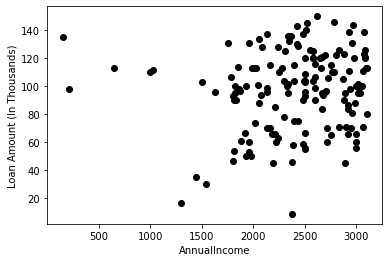

In [30]:
X = data[["LoanAmount","ApplicantIncome"]]

#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3).fit(X)

In [10]:
cluster = kmeans.labels_

Cluster1=X.loc[cluster==0]
Cluster2=X.loc[cluster==1]
Cluster3=X.loc[cluster==2]

Cluster1.describe()

,LoanAmount,ApplicantIncome
count,41.000000,41.000000
mean,120.926829,6519.414634
std,25.683059,1085.138654
min,26.000000,5316.000000
25%,115.000000,5746.000000
50%,128.000000,6216.000000
75%,137.000000,7100.000000
max,150.000000,9703.000000


In [11]:
Cluster2.describe()

,LoanAmount,ApplicantIncome
count,175.000000,175.000000
mean,96.782857,2493.868571
std,29.012854,564.980510
min,9.000000,150.000000
25%,74.000000,2166.000000
50%,100.000000,2526.000000
75%,120.000000,2952.000000
max,150.000000,3254.000000


In [12]:
Cluster3.describe()

,LoanAmount,ApplicantIncome
count,149.000000,149.000000
mean,110.181208,4023.885906
std,26.163481,527.980325
min,25.000000,3273.000000
25%,100.000000,3593.000000
50%,115.000000,3902.000000
75%,129.000000,4408.000000
max,150.000000,5250.000000


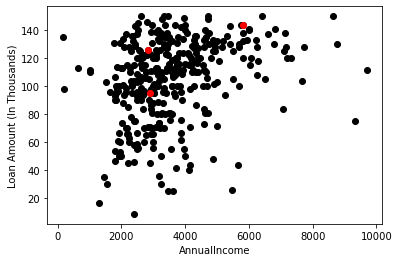

In [16]:
K=3

Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()



In [18]:
y_kmeans = kmeans.fit_predict(X)

In [20]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]


<ipython-input-20-7e498e144d8d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-20-7e498e144d8d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


150.74802457586725
276.56875775847266
297.20617528335436
220.3911746487979
274.507342220739
122.45155653170333
18.785332520104774
0.0


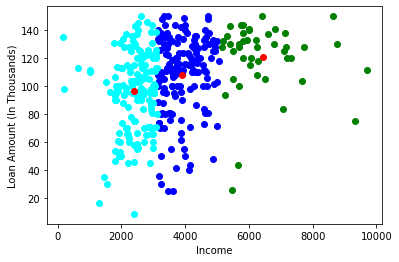

In [21]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()